In [5]:
import pandas as pd
from sklearn.cluster import KMeans # أفضل خوارزمية تجميع 

import warnings 
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('Mall_Customers.csv')

In [7]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]
# هنا نريد تجميع عناصر العامودين ضمن مجموعة فئات 

In [9]:
K = KMeans()
K.fit_predict(X)

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 5, 4, 5, 5,
       2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 0, 5, 5, 0, 0, 5, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1, 6, 0, 6, 1, 6, 1, 6,
       0, 6, 1, 6, 1, 6, 1, 6, 1, 6, 0, 6, 1, 6, 0, 6, 1, 6, 1, 6, 1, 6,
       1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6,
       1, 6, 1, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3,
       7, 3])

In [10]:
# إختيار عدد الوعاءات الأفضل للتحميع أي عدد المجموعة التي تم التجميع فيها 
wcss = []
for i in range(1,11):
    k = KMeans(n_clusters=i)
    k.fit(X)
    wcss.append(k.inertia_)

In [11]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25061.304119069333,
 22119.99312141347,
 19657.783608703958]

In [25]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'wcss')

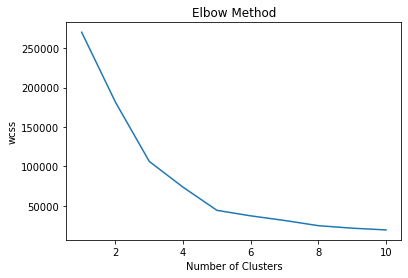

In [26]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')


In [27]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [28]:
k = KMeans(n_clusters=5,random_state=1)
y_means = k.fit_predict(X)

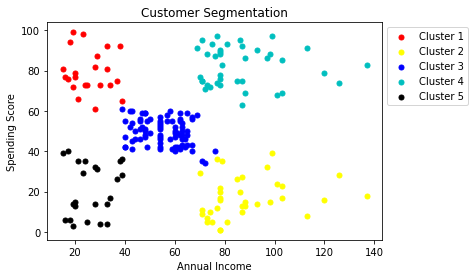

In [29]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=25,c='red',label='Cluster 1' )
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=25,c='yellow',label='Cluster 2' )
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=25,c='blue',label='Cluster 3' )
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=25,c='c',label='Cluster 4' )
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=25,c='black',label='Cluster 5' )
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor=(1,1))

k

In [30]:
k.predict([[15,39]])

array([4])

In [31]:
import joblib 
joblib.dump(k,'customer_model')
model = joblib.load('customer_model')
model.predict([[15,39]])

array([4])